<a href="https://colab.research.google.com/github/gowtham-dd/Data-Science-Basics/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv("https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/dtplay.csv")
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [2]:


from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cols = ['outlook', 'temp', 'humidity', 'windy','play']
# Encode labels of multiple columns at once
df[cols] = df[cols].apply(le.fit_transform)




# Print head
df.head()

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1


In [3]:
x=df.drop("play",axis=1)
y=df['play']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=2)
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.3333333333333333
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3

[[0 1]
 [1 1]]


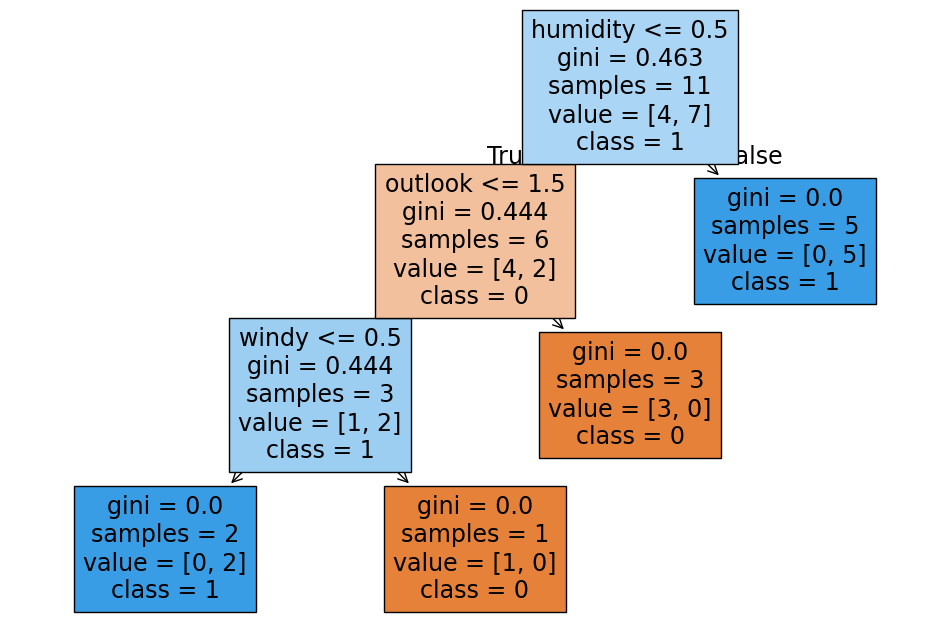

In [4]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=x.columns, class_names=['0', '1'], filled=True)
plt.show()

In [5]:
# New dataset




import kagglehub


# Download latest version
path = kagglehub.dataset_download("taweilo/loan-approval-classification-data")


print("Path to dataset files:", path)


100%|██████████| 751k/751k [00:00<00:00, 84.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/taweilo/loan-approval-classification-data/versions/1


In [9]:
df=pd.read_csv(r"/root/.cache/kagglehub/datasets/taweilo/loan-approval-classification-data/versions/1/loan_data.csv")
df


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cols = ['person_home_ownership','person_gender', 'person_education','loan_intent','previous_loan_defaults_on_file']
# Encode labels of multiple columns at once
df[cols] = df[cols].apply(le.fit_transform)
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0,1
44996,37.0,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0,1
44997,33.0,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0,1
44998,29.0,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0,1


In [12]:
df['loan_status'].value_counts()

,count
loan_status,
0,35000
1,10000


0.8984444444444445
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6984
           1       0.77      0.77      0.77      2016

    accuracy                           0.90      9000
   macro avg       0.85      0.85      0.85      9000
weighted avg       0.90      0.90      0.90      9000

[[6528  456]
 [ 458 1558]]


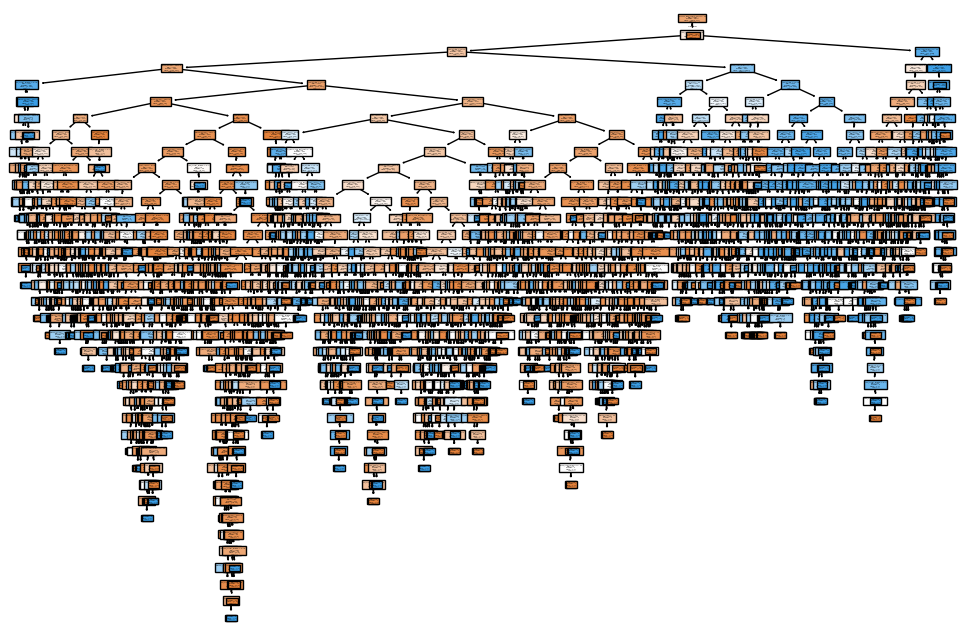

In [13]:
# prompt: split the model scale it and train the model and find accuracy

import matplotlib.pyplot as plt
# Splitting the data
x = df.drop("loan_status", axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# Training the model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Making predictions
y_pred = dt.predict(X_test)

# Evaluating the model
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Visualizing the decision tree (optional)
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=x.columns, class_names=['0', '1'], filled=True) # Assuming binary classification, adjust class_names if needed
plt.show()
